In [163]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
countries = pd.read_csv('countries.csv')
countries.head()

,Country,Number of Paragraphs,Frequent Words,Frequent Word Count,Word Count,Polarity,Subjectivity,war,poverty,corruption,insecurity,crime,art,tourism
0,Angola,139,"angola,portuguese,angolan,luanda,government,mp...","116,53,46,27,25,24,24,24,22,21",10047,0.054,0.355,58,3,11,0,3,141,3
1,Benin,86,"benin,country,dahomey,african,french,west,gove...","85,22,20,20,19,19,18,15,14,14",5513,0.048,0.298,12,4,2,0,2,103,4
2,Botswana,84,"botswana,africa,country,government,botswanas,s...","140,37,32,23,22,21,21,21,18,18",7173,0.065,0.350,15,3,4,0,0,92,12
3,Burkina Faso,162,"burkina,faso,country,french,national,governmen...","136,105,46,42,39,36,35,32,30,30",10998,0.062,0.333,19,3,3,11,5,142,2
4,Burundi,113,"burundi,hutu,burundis,government,tutsi,burundi...","101,46,40,39,34,29,26,24,21,20",7723,0.053,0.313,44,3,2,0,6,137,2


In [165]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               53 non-null     object 
 1   Number of Paragraphs  53 non-null     int64  
 2   Frequent Words        53 non-null     object 
 3   Frequent Word Count   53 non-null     object 
 4   Word Count            53 non-null     int64  
 5   Polarity              53 non-null     float64
 6   Subjectivity          53 non-null     float64
 7   war                   53 non-null     int64  
 8   poverty               53 non-null     int64  
 9   corruption            53 non-null     int64  
 10  insecurity            53 non-null     int64  
 11  crime                 53 non-null     int64  
 12  art                   53 non-null     int64  
 13  tourism               53 non-null     int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 5.9+ KB


In [166]:
countries.describe()

,Number of Paragraphs,Word Count,Polarity,Subjectivity,war,poverty,corruption,insecurity,crime,art,tourism
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,117.452830,8938.830189,0.063132,0.325358,35.471698,3.981132,5.169811,0.452830,2.471698,123.811321,7.188679
std,38.181533,3290.066616,0.018841,0.051039,25.705884,3.968581,5.355572,1.600073,3.190152,38.624452,6.827705
min,1.000000,40.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,88.000000,6298.000000,0.051000,0.315000,16.000000,1.000000,1.000000,0.000000,0.000000,98.000000,1.000000
50%,116.000000,7939.000000,0.063000,0.333000,28.000000,2.000000,3.000000,0.000000,1.000000,123.000000,5.000000
75%,148.000000,11755.000000,0.075000,0.350000,45.000000,6.000000,8.000000,0.000000,4.000000,146.000000,12.000000
max,221.000000,17904.000000,0.107000,0.370000,97.000000,15.000000,21.000000,11.000000,16.000000,237.000000,30.000000


In [167]:
# remove outliers, rown with word count less than 100
countries = countries[countries['Word Count'] > 100]

In [168]:
#  correlation matrix to see if there is any relationship between the columns
numric_columns = countries.select_dtypes(include=['int64', 'float64']).columns
countries[numric_columns].corr()


,Number of Paragraphs,Word Count,Polarity,Subjectivity,war,poverty,corruption,insecurity,crime,art,tourism
Number of Paragraphs,1.000000,0.875712,0.435985,0.584807,0.613409,0.174776,0.237152,0.155513,0.271763,0.734082,0.371840
Word Count,0.875712,1.000000,0.320517,0.525613,0.720597,0.257795,0.254222,0.113623,0.390019,0.821293,0.388183
Polarity,0.435985,0.320517,1.000000,0.629395,0.208367,0.080287,0.148352,-0.032028,0.176985,0.324756,0.474927
Subjectivity,0.584807,0.525613,0.629395,1.000000,0.325907,0.385420,0.467382,0.007957,0.311932,0.390004,0.370740
war,0.613409,0.720597,0.208367,0.325907,1.000000,0.055314,0.193767,-0.096020,0.501160,0.625932,0.108503
poverty,0.174776,0.257795,0.080287,0.385420,0.055314,1.000000,0.296244,-0.025667,0.287734,0.248351,0.144237
corruption,0.237152,0.254222,0.148352,0.467382,0.193767,0.296244,1.000000,-0.016913,0.396228,0.226280,0.034036
insecurity,0.155513,0.113623,-0.032028,0.007957,-0.096020,-0.025667,-0.016913,1.000000,0.096862,0.030649,-0.069190
crime,0.271763,0.390019,0.176985,0.311932,0.501160,0.287734,0.396228,0.096862,1.000000,0.438291,-0.067191
art,0.734082,0.821293,0.324756,0.390004,0.625932,0.248351,0.226280,0.030649,0.438291,1.000000,0.390836


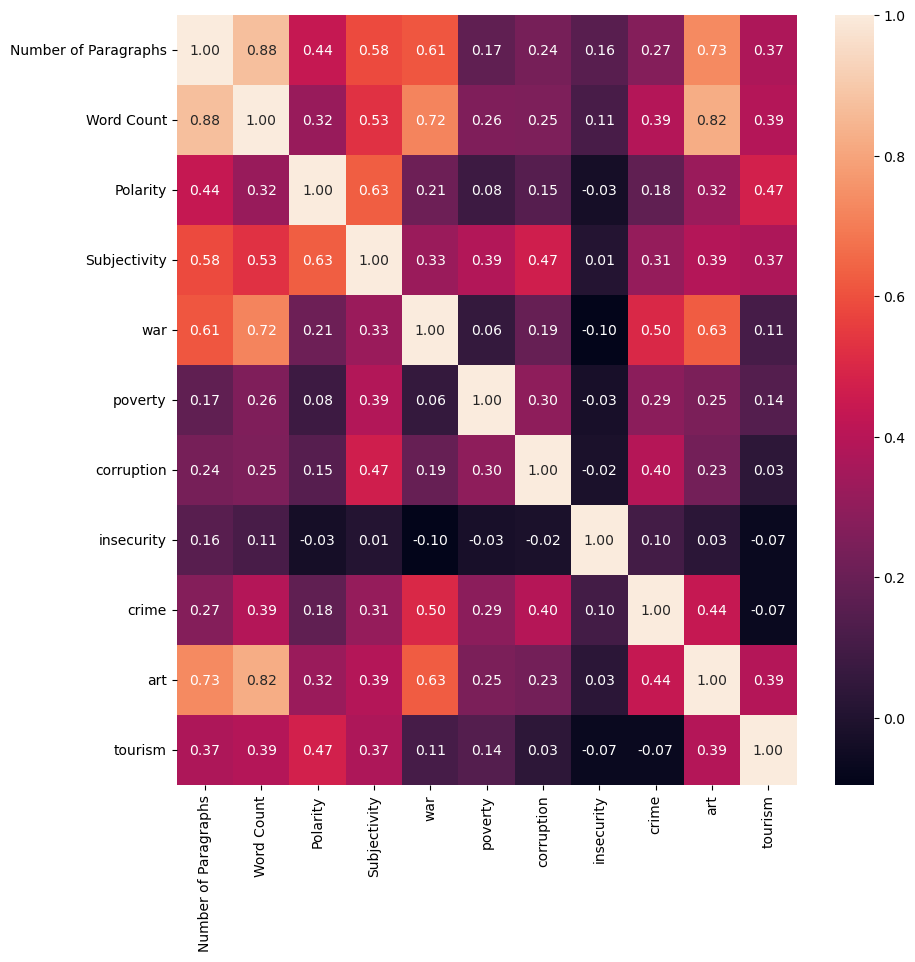

In [169]:
# plot correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(countries[numric_columns].corr(), annot=True, fmt=".2f")
plt.show()


<Axes: title={'center': 'Word Count Distribution of Countries Description'}, ylabel='Frequency'>

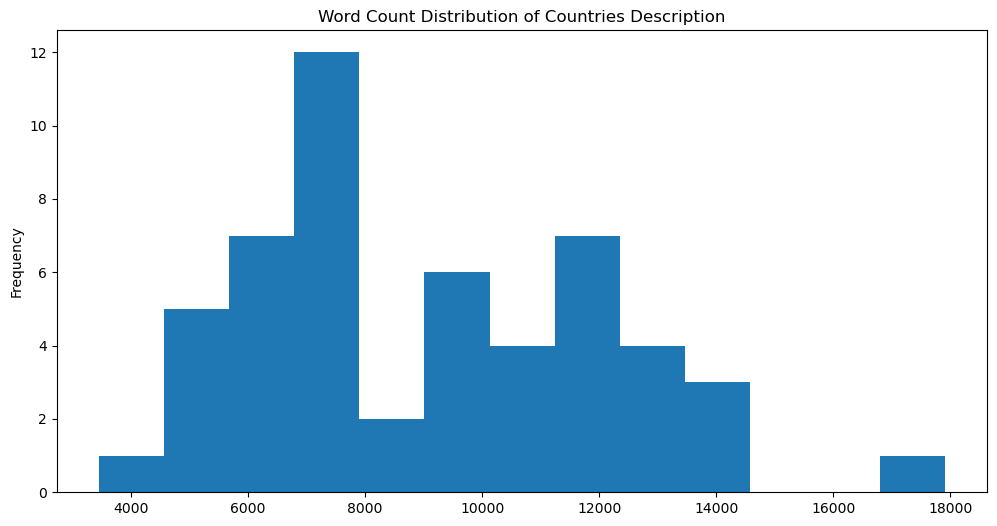

In [170]:
# plot word count distribution
countries['Word Count'].plot(
    kind='hist',
    bins=13,
    figsize=(12, 6),
    title='Word Count Distribution of Countries Description'
)

## Show the most frequent words in wiki articles about africa

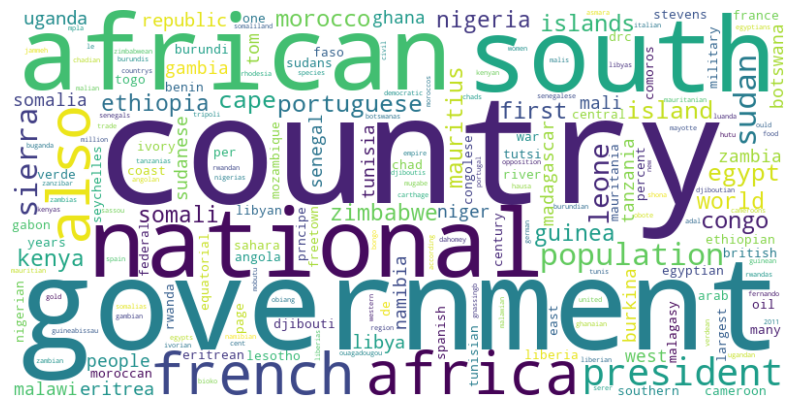

In [171]:
# extract all words and count the frequency
frequent_words_dict = countries[["Frequent Words", "Frequent Word Count"]].values
overall_frequent_words = {}

for record in frequent_words_dict:
    words = record[0].split(',')
    counts = record[1].split(',')
    record_dict = dict(zip(words, counts))
    for word, count in record_dict.items():
        if word in overall_frequent_words:
            overall_frequent_words[word] += int(count)
        else:
            overall_frequent_words[word] = int(count)
    

# create word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', random_state=1).generate_from_frequencies(overall_frequent_words)

# save word cloud to file
wordcloud.to_file('wordcloud.png')

# display word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



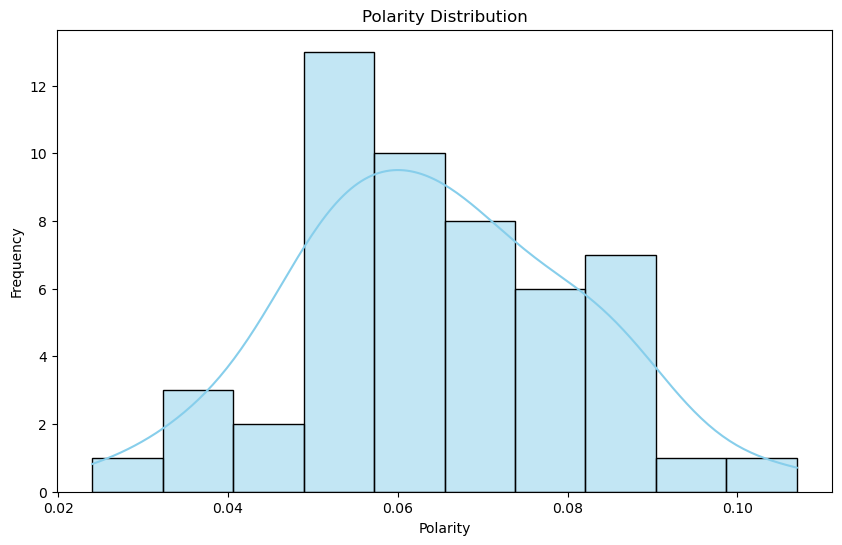

In [185]:
# plot the polarity and subjectivity distribution
plt.figure(figsize=(10, 6))
sns.histplot(countries['Polarity'], bins=10, color='skyblue', kde=True)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()



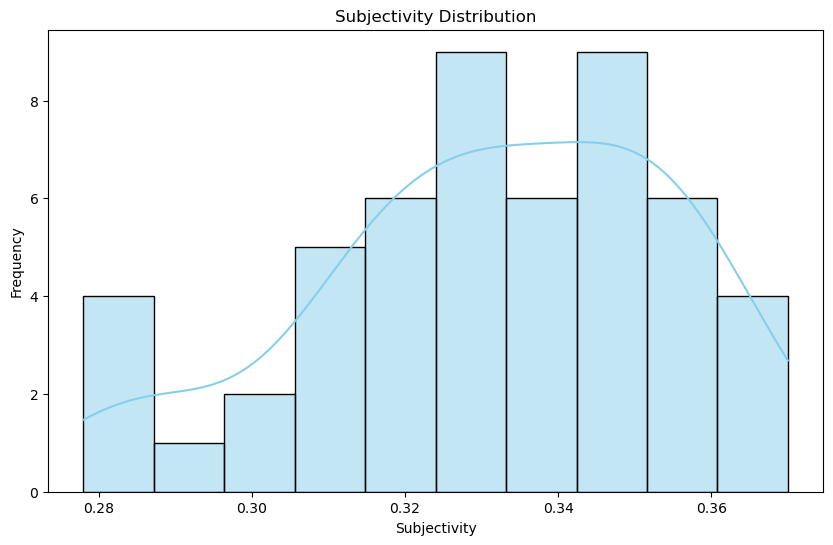

In [186]:
plt.figure(figsize=(10, 6))
sns.histplot(countries['Subjectivity'], bins=10, color='skyblue', kde=True)
plt.title('Subjectivity Distribution')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

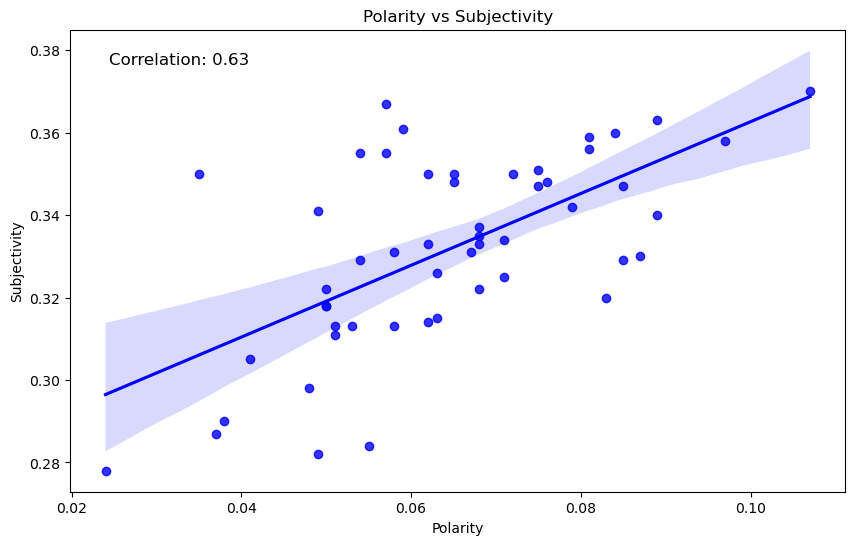

In [ ]:
# compare the polarity and subjectivity of the countries
plt.figure(figsize=(10, 6))
# plt.scatter(countries['Polarity'], countries['Subjectivity'], color='skyblue')

correlation_pol_sub = countries[['Polarity', 'Subjectivity']].corr()

plt.text(0.05, 0.95, f"Correlation: {correlation_pol_sub.iloc[0, 1]:.2f}", transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

sns.regplot(x='Polarity', y='Subjectivity', data=countries, scatter=True, color='blue')

plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [176]:
for mention in ["war","poverty","corruption","insecurity","crime", "art", "tourism"]:
    # print(countries[mention])
    # show top 5 countries with the highest mention of the word
    top_countries = countries.nlargest(5, mention)
    print(f"Top 5 countries with the highest mention of {mention}:")
    print(top_countries["Country"].values, top_countries[mention].values)
    print("\n")


Top 5 countries with the highest mention of war:
['Sudan' 'Somalia' 'Libya' 'Ethiopia' 'Sierra Leone'] [97 90 86 83 83]


Top 5 countries with the highest mention of poverty:
['Tanzania' 'Uganda' 'Chad' 'Nigeria' 'South Africa'] [15 15 14 13 10]


Top 5 countries with the highest mention of corruption:
['Kenya' 'Congo (Kinshasa)' 'Liberia' 'Uganda' 'Cameroon'] [21 18 17 17 16]


Top 5 countries with the highest mention of insecurity:
['Burkina Faso' 'Zimbabwe' 'Lesotho' 'Madagascar' 'Cameroon'] [11  3  2  2  1]


Top 5 countries with the highest mention of crime:
['South Africa' 'Sudan' 'Congo (Kinshasa)' 'Liberia' 'Nigeria'] [16 10  8  8  8]


Top 5 countries with the highest mention of art:
['South Africa' 'Tunisia' 'Sierra Leone' 'Tanzania' 'Sudan'] [237 188 187 182 173]


Top 5 countries with the highest mention of tourism:
['Namibia' 'Egypt' 'Seychelles' 'Zimbabwe' 'Morocco'] [30 22 21 19 16]


